In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

In [2]:
print(os.getcwd())

/Users/Jessica/Downloads/College Classes/Fall 2020/CS309/energyanalytics-master/Python Workflows


In [3]:
os.listdir(os.getcwd())

['Golden 4-21H.csv',
 'State 3-156H.csv',
 'Federal 3-123H.csv',
 'Burger 10-170H.csv',
 'completions_production.csv',
 'Sutherland 1-11H.csv',
 'Golden 8-14H.csv',
 'Brisket 3-212H.csv',
 'Numpy Networks in class.ipynb',
 'Week_13b_validation.ipynb',
 'Federal 8-142H.csv',
 'Laramie 9-10H.csv',
 'Brisket 1-44H.csv',
 'Gunnison 12-38H.csv',
 'Gunnison 13-160H.csv',
 'King 2-120H.csv',
 'Federal 14-113H.csv',
 'production_data.JPG',
 'Golden 9-62H.csv',
 'Gunnison 8-30H.csv',
 'Problem Set 2.ipynb',
 'well_data_.csv',
 'Linear Regression Notebook.ipynb',
 'Tribal 14-4H.csv',
 'Fennel 10-129H.csv',
 'Sutherland 11-157H.csv',
 'Class Notebook.ipynb',
 'Salt 12-135H.csv',
 '.DS_Store',
 'Sutherland 6-34H.csv',
 'State 4-189H.csv',
 'Clustering Notebook.ipynb',
 'Week_08_regression.ipynb',
 'Sundae 14-192H.csv',
 'Dakota 10-199H.csv',
 'Week_12_PyTorch.ipynb',
 'Week_05_Linear_regression.ipynb',
 'Sundae 7-180H.csv',
 'King 13-28H.csv',
 'Peak 3-55H.csv',
 'Sundae 1-129H.csv',
 'Burger 3-45

In [4]:
os.listdir(os.path.join(os.getcwd(), 'well production'))

['Golden 4-21H.csv',
 'State 3-156H.csv',
 'Federal 3-123H.csv',
 'Burger 10-170H.csv',
 'Sutherland 1-11H.csv',
 'Golden 8-14H.csv',
 'Brisket 3-212H.csv',
 'Federal 8-142H.csv',
 'Laramie 9-10H.csv',
 'Brisket 1-44H.csv',
 'Gunnison 12-38H.csv',
 'Gunnison 13-160H.csv',
 'King 2-120H.csv',
 'Federal 14-113H.csv',
 'Golden 9-62H.csv',
 'Gunnison 8-30H.csv',
 'Tribal 14-4H.csv',
 'Fennel 10-129H.csv',
 'Sutherland 11-157H.csv',
 'Salt 12-135H.csv',
 '.DS_Store',
 'Sutherland 6-34H.csv',
 'State 4-189H.csv',
 'Sundae 14-192H.csv',
 'Dakota 10-199H.csv',
 'Sundae 7-180H.csv',
 'King 13-28H.csv',
 'Peak 3-55H.csv',
 'Sundae 1-129H.csv',
 'Burger 3-45H.csv',
 'King 14-184H.csv',
 'Brisket 7-105H.csv',
 'Burger 6-148H.csv',
 'Sundae 1-163H.csv',
 'Tarragon 10-11H.csv',
 'Brisket 6-50H.csv',
 'Brisket 10-65H.csv',
 'Golden 14-27H.csv',
 'Pole 3-201H.csv',
 'Federal 3-125H.csv',
 'Pepper 8-129H.csv',
 'Sundae 8-150H.csv',
 'King 5-15H.csv',
 'Tarragon 4-119H.csv',
 'King 13-215H.csv',
 'Triba

Area of the resevoir: determined by how far the fractures created by propogation go out to. The area here will be calculated with proppant weight and (estimated) thickness of resevoir.

In [5]:
#volume of proppant: calculated by proppant weight (units converted)
#density of quartz: 2.65 gram per cubic centimeter
#1 lb = 453.592 g
#1 cubic centimeter = 3.53 e^ -5 cubic feet 
#returns volume in cubic feet 

def get_volume(weight, por):
    return weight * 453.592 * (1 - por) / 2.65 * (3.53 * math.exp(-5))

In [6]:
#to get area: volume = area * height (thickness of resevoir)
#returns area in square feet 
def get_area(volume, thickness, well_length):
    return volume * well_length / (2 * thickness * 0.4)

Summarization: Because well length and area of the reservoir have a direct positive correlation, the maximum the well length returns the maximum area. So we choose 5 miles, 26400 feet, the maximum well length can get to be the well length. 

In [7]:
areaMin = []
areaMax = []
porosity = []
water_saturation = []
files = 0;
well_files = []

In [8]:
for well_file in os.listdir(os.path.join(os.getcwd(), 'well production')):
    if (well_file.endswith('.csv')):
        files += 1
        well_files.append(well_file)
        area_file = pd.read_csv(well_file)
        area_file = area_file.dropna()
        sand_vol  = np.mean(get_volume(area_file['proppant weight (lbs)'], area_file['porosity']))
        thickness = 21
        area_mean = get_area(sand_vol, thickness, 26400)
        areaMin.append(area_mean)
        thickness = 79
        area_mean = get_area(sand_vol, thickness, 26400)
        areaMax.append(area_mean)
        porosity_mean = area_file['porosity'].mean()
        porosity.append(porosity_mean)
        water_saturation_mean = area_file['water saturation'].mean()
        water_saturation.append(water_saturation_mean)
print(well_files)

['Golden 4-21H.csv', 'State 3-156H.csv', 'Federal 3-123H.csv', 'Burger 10-170H.csv', 'Sutherland 1-11H.csv', 'Golden 8-14H.csv', 'Brisket 3-212H.csv', 'Federal 8-142H.csv', 'Laramie 9-10H.csv', 'Brisket 1-44H.csv', 'Gunnison 12-38H.csv', 'Gunnison 13-160H.csv', 'King 2-120H.csv', 'Federal 14-113H.csv', 'Golden 9-62H.csv', 'Gunnison 8-30H.csv', 'Tribal 14-4H.csv', 'Fennel 10-129H.csv', 'Sutherland 11-157H.csv', 'Salt 12-135H.csv', 'Sutherland 6-34H.csv', 'State 4-189H.csv', 'Sundae 14-192H.csv', 'Dakota 10-199H.csv', 'Sundae 7-180H.csv', 'King 13-28H.csv', 'Peak 3-55H.csv', 'Sundae 1-129H.csv', 'Burger 3-45H.csv', 'King 14-184H.csv', 'Brisket 7-105H.csv', 'Burger 6-148H.csv', 'Sundae 1-163H.csv', 'Tarragon 10-11H.csv', 'Brisket 6-50H.csv', 'Brisket 10-65H.csv', 'Golden 14-27H.csv', 'Pole 3-201H.csv', 'Federal 3-125H.csv', 'Pepper 8-129H.csv', 'Sundae 8-150H.csv', 'King 5-15H.csv', 'Tarragon 4-119H.csv', 'King 13-215H.csv', 'Tribal 2-17H.csv', 'Federal 8-38H.csv', 'Golden 7-109H.csv', 'P

In [9]:
print(areaMin)

[4189292685.9884415, 4344639727.655664, 4322081032.104948, 4060611855.1316924, 3956652820.757246, 5150509258.556935, 4049843056.2900534, 4752359998.589894, 4546951977.592618, 3730735484.3529525, 4069314516.358777, 4480823010.82008, 4786658640.003478, 3864701647.4901776, 4060130873.7450686, 5311086219.820927, 4242273911.621393, 5120780155.530592, 4604005195.049387, 4598000616.880289, 4855636198.864015, 4167766543.66136, 4221307225.6097555, 4508080433.128704, 4112477294.90103, 3926589482.533763, 5245033670.186418, 4868704585.347733, 5030597031.202657, 4948989158.282363, 3342695456.7673817, 3987333397.262591, 3839662650.864522, 5543555097.915683, 5242822507.347517, 4749440028.791103, 4048777123.4031973, 4217489258.413104, 4199783462.540425, 3714849939.234552, 4573570082.10471, 4936872686.121458, 4385575076.380865, 5103813732.246073, 4300761744.673712, 5154540685.647555, 3755476016.9948373, 4997014129.780221, 4897156489.350297, 4549509822.389851, 4182992599.191788, 4150944623.6412063, 5252

In [10]:
print(areaMax)

[1113609448.1741426, 1154904231.4021385, 1148907616.1291633, 1079403151.3641207, 1051768471.3405337, 1369122714.2999449, 1076540559.266976, 1263285569.245415, 1208683437.081582, 991714495.8406583, 1081716517.0067635, 1191104850.9774895, 1272402929.621178, 1027325754.3961232, 1079275295.5524867, 1411807729.3194869, 1127693065.1145475, 1361220041.3435752, 1223849482.228318, 1222253328.5377982, 1290738736.40689, 1107887309.0745387, 1122119642.2506945, 1198350494.8823137, 1093190166.999008, 1043776951.0532788, 1394249456.6318326, 1294212611.2949667, 1337247312.0918455, 1315554080.0497422, 888564615.0900636, 1059924067.6267647, 1020669818.58424, 1473603253.8763208, 1393661679.1683273, 1262509374.7419388, 1076257210.0185714, 1121104739.578167, 1116398135.6120117, 987491755.999058, 1215759135.7493532, 1312333245.677856, 1165785779.797445, 1356709979.4578168, 1143240463.7740245, 1370194359.4759326, 998291093.1252099, 1328320211.7137296, 1301775775.650079, 1209363370.5086944, 1111934741.5573108

In [11]:
print(porosity)

[0.04147058823529414, 0.06739999999999999, 0.053399999999999954, 0.06676470588235296, 0.0658, 0.033000000000000015, 0.07480000000000003, 0.08139999999999999, 0.0644, 0.07166666666666668, 0.06750000000000002, 0.013235294117647064, 0.024800000000000013, 0.08794117647058826, 0.020588235294117657, 0.03919999999999997, 0.02529411764705883, 0.045200000000000025, 0.049705882352941204, 0.03897959183673472, 0.035294117647058844, 0.08264705882352942, 0.052941176470588255, 0.031176470588235302, 0.04125, 0.084, 0.019800000000000012, 0.05352941176470591, 0.051899999999999974, 0.028399999999999967, 0.038, 0.06400000000000003, 0.07279999999999998, 0.033000000000000015, 0.03880000000000003, 0.0808, 0.03780000000000002, 0.06480000000000002, 0.04933333333333335, 0.05, 0.04200000000000001, 0.06519999999999998, 0.08700000000000001, 0.043800000000000026, 0.08859999999999997, 0.03880000000000003, 0.0697058823529412, 0.044200000000000024, 0.057499999999999996, 0.06120000000000001, 0.07529411764705884, 0.0662

In [12]:
print(water_saturation)

[0.13615677865437636, 0.2942094069704845, 0.12028484999150921, 0.1503413401136336, 0.18128738664914998, 0.11961433591096307, 0.24362086243843312, 0.19164079810811224, 0.2718902721634364, 0.20328076085997135, 0.2027034572595634, 0.10597918087316545, 0.11930907509963251, 0.05923421930746026, 0.16725956268003356, 0.25324788347646476, 0.06805938191159301, 0.11163842993647265, 0.12663213586000477, 0.23995247874366946, 0.020149479958379696, 0.0022303322621254357, 0.2313466959605106, 0.12563213669387124, 0.24677990032844263, 0.034092955807245466, 0.19383786985195783, 0.23808976577694646, 0.0, 0.21960632844301567, 0.13460555255007153, 0.30161105593399673, 0.26823574147181456, 0.18200413324080583, 0.04897009699206596, 0.1666348185115458, 0.21094037923352907, 0.08697624447690386, 0.30045141180519813, 0.260254955450598, 0.21805005571257552, 0.2810600930598255, 0.14367381555746228, 0.2792314733475522, 0.12038030543419363, 0.030916499619813385, 0.22346116390696144, 0.02123070494133141, 0.2854395348

In [13]:
def getOOIP(area, thickness, porosity, water_saturation, FVF):
    return 7758 * area * thickness * (1 - water_saturation) / FVF;

In [14]:
minOOIP = []
maxOOIP = []

In [15]:
for i in range(files):
    minOOIP.append(getOOIP(areaMin[i], 21, porosity[i], water_saturation[i], 1.6))
    maxOOIP.append(getOOIP(areaMax[i], 21, porosity[i], water_saturation[i], 1.6))

In [16]:
print(minOOIP)

[368489163349748.9, 312232942656890.1, 387154278898901.7, 351305584647003.2, 329843942765536.56, 461713126344029.8, 311908221453311.25, 391167536971289.06, 337105849278705.8, 302655694660879.06, 330362105929908.25, 407900755445005.2, 429244822481514.5, 370208658319800.3, 344269678809793.6, 403839598386066.0, 402565019148078.94, 463206858856881.44, 409432299216476.6, 355843354408940.44, 484456798931540.3, 423431115506050.5, 330389735917941.5, 401360778638937.9, 315409304813820.9, 386189017987222.8, 430546200408339.9, 377716814631748.6, 512234254455921.44, 393259595943996.6, 294550661752889.44, 283549570157121.7, 286097030515151.0, 461730501880217.9, 507701463253513.6, 403020230395363.94, 325299036686219.94, 392089443708523.2, 299153350233961.0, 279815924673721.44, 364152569450438.2, 361404541800980.7, 382397338879318.9, 374575801729554.7, 385202782817960.75, 508627993177690.3, 296945850359792.9, 498012222360218.56, 356313316541944.2, 412752414632475.7, 336456862013808.9, 348291355178465

In [17]:
print(maxOOIP)

[97952815573983.88, 82998630326515.1, 102914428568062.45, 93385028830216.03, 87680035418686.92, 122733869028159.84, 82912312031892.86, 103981244005026.22, 89610415631048.38, 80452779593398.23, 87817774994026.22, 108429314738545.67, 114103054077364.64, 98409896515389.94, 91514724746907.19, 107349766659587.14, 107010954457084.27, 123130937164487.5, 108836433968936.83, 94591271425161.38, 128779655412181.6, 112557638299076.72, 87825119674389.52, 106690839891363.23, 83842979760635.94, 102657840224451.61, 114448989981963.78, 100405735535021.8, 136163535994612.05, 104537360947138.36, 78298277174818.7, 75373936370880.44, 76051109377445.19, 122738487841576.89, 134958616814225.12, 107131959978514.45, 86471895827982.52, 104226307821253.02, 79521776644470.64, 74381448330989.23, 96800050107078.52, 96069561744564.48, 101649925524882.22, 99570782738236.06, 102395676445280.7, 135204909578879.72, 78934972880451.28, 132382995817273.31, 94716198068111.77, 109718996294708.72, 89437900028987.16, 9258377795

In [18]:
recovery_factor_min = 0.01
recovery_factor_max = 0.1

In [19]:
recoverable_reserves_min = []
recoverable_reserves_max = []

In [20]:
for i in range(files):
    recoverable_reserves_min.append(recovery_factor_min * minOOIP[i])
    recoverable_reserves_max.append(recovery_factor_max * maxOOIP[i])

In [21]:
print(recoverable_reserves_min)

[3684891633497.489, 3122329426568.9014, 3871542788989.017, 3513055846470.0317, 3298439427655.3657, 4617131263440.298, 3119082214533.113, 3911675369712.8906, 3371058492787.058, 3026556946608.7905, 3303621059299.0825, 4079007554450.052, 4292448224815.145, 3702086583198.0034, 3442696788097.9365, 4038395983860.66, 4025650191480.7896, 4632068588568.814, 4094322992164.766, 3558433544089.4043, 4844567989315.403, 4234311155060.505, 3303897359179.415, 4013607786389.379, 3154093048138.209, 3861890179872.228, 4305462004083.399, 3777168146317.4863, 5122342544559.215, 3932595959439.9663, 2945506617528.8945, 2835495701571.217, 2860970305151.5103, 4617305018802.179, 5077014632535.137, 4030202303953.6396, 3252990366862.199, 3920894437085.232, 2991533502339.61, 2798159246737.2144, 3641525694504.382, 3614045418009.807, 3823973388793.189, 3745758017295.547, 3852027828179.6074, 5086279931776.903, 2969458503597.9287, 4980122223602.186, 3563133165419.442, 4127524146324.757, 3364568620138.089, 3482913551784.

In [22]:
print(recoverable_reserves_max)

[9795281557398.389, 8299863032651.51, 10291442856806.246, 9338502883021.604, 8768003541868.692, 12273386902815.984, 8291231203189.286, 10398124400502.623, 8961041563104.838, 8045277959339.824, 8781777499402.622, 10842931473854.568, 11410305407736.465, 9840989651538.994, 9151472474690.719, 10734976665958.715, 10701095445708.428, 12313093716448.75, 10883643396893.684, 9459127142516.139, 12877965541218.16, 11255763829907.672, 8782511967438.952, 10669083989136.324, 8384297976063.594, 10265784022445.162, 11444898998196.379, 10040573553502.18, 13616353599461.205, 10453736094713.836, 7829827717481.871, 7537393637088.044, 7605110937744.52, 12273848784157.69, 13495861681422.514, 10713195997851.445, 8647189582798.252, 10422630782125.303, 7952177664447.064, 7438144833098.924, 9680005010707.852, 9606956174456.45, 10164992552488.223, 9957078273823.607, 10239567644528.07, 13520490957887.973, 7893497288045.129, 13238299581727.332, 9471619806811.178, 10971899629470.873, 8943790002898.717, 925837779588

In [23]:
locationFile = pd.read_csv("well_data_.csv")

In [24]:
locationFile.head()

,well name,avg proppant weight,avg pump rate,num frac stages,pred production
0,Brisket 3-212H,684992.449778,292.153079,25,44706.589585
1,Laramie 14-76H,877016.788159,298.515356,50,95059.346916
2,Peak 3-55H,836894.990963,307.676437,50,9100.660008
3,State 4-189H,711049.925353,305.655797,34,105064.454447
4,Federal 12-111H,702813.004769,308.407084,50,92886.729934


Text(0, 0.5, 'pred production')

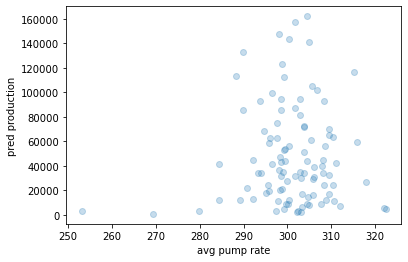

In [25]:
X = locationFile['avg pump rate'].values
y = locationFile['pred production'].values
plt.scatter(X,y, alpha=0.25)
plt.xlabel('avg pump rate')
plt.ylabel('pred production')

Summarization: From the graph, we can notice that pump rate in the range of 300 to 310 are producing the same production. So we choose the lowest, 300 as the pump rate to minimize the cost. 

Text(0, 0.5, 'pred production')

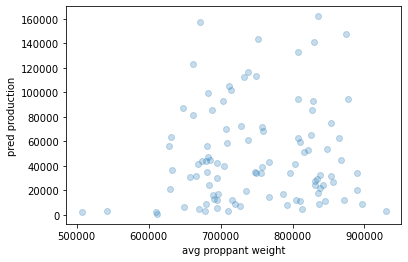

In [26]:
X = locationFile['avg proppant weight'].values
y = locationFile['pred production'].values
plt.scatter(X,y, alpha=0.25)
plt.xlabel('avg proppant weight')
plt.ylabel('pred production')

Summarization: From the graph, we can notice proppant weight does not have correlation with production. So we will take the average of the surrounding wells as the proppant weight. 

Text(0, 0.5, 'pred production')

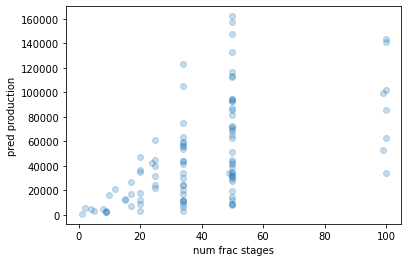

In [27]:
X = locationFile['num frac stages'].values
y = locationFile['pred production'].values
plt.scatter(X,y, alpha=0.25)
plt.xlabel('num frac stages')
plt.ylabel('pred production')

Summarization: From the graph, we can notice that 50 frac stages is optimal. So we will choose 50 frac stages as the frac stage number. 